In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import model_selection


In [12]:
pip install pydotplus


Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [27]:
conda create -n myenv python=3.8


^C

Note: you may need to restart the kernel to use updated packages.


In [28]:
conda activate myenv



Note: you may need to restart the kernel to use updated packages.



EnvironmentNameNotFound: Could not find conda environment: myenv
You can list all discoverable environments with `conda info --envs`.




In [29]:
pip install tensorflow


^C
Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install --upgrade tensorflow


Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
import pydotplus
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
dataset1 = pd.read_csv("C:\\Users\\KIIT\\Dropbox\\My PC (DESKTOP-T2MIRLG)\\Downloads\\Crop and Fertilizer recommendation\\Crop_recommendation (1).csv")
dataset2 = pd.read_csv("C:\\Users\\KIIT\\Dropbox\\My PC (DESKTOP-T2MIRLG)\\Downloads\\Crop and Fertilizer recommendation\\Fertilizer Prediction (1).csv")
dataset3 = pd.read_csv("C:\\Users\\KIIT\\Dropbox\\My PC (DESKTOP-T2MIRLG)\\Downloads\\Crop and Fertilizer recommendation\\crop_production.csv")
dataset4 = pd.read_csv("C:\\Users\\KIIT\\Dropbox\\My PC (DESKTOP-T2MIRLG)\\Downloads\\Crop and Fertilizer recommendation\\state_wise_crop_production (1).csv")

In [31]:
print(dataset1)

        N    P    K        ph       label
0      24  128  196  5.521467       apple
1       7  144  197  6.133221       apple
2      14  128  205  6.226290       apple
3       8  120  201  6.321152       apple
4      20  129  201  5.587906       apple
...   ...  ...  ...       ...         ...
2195   97   12   47  6.765095  watermelon
2196  110    7   45  6.189214  watermelon
2197   96   18   50  6.904242  watermelon
2198   83   23   55  6.463271  watermelon
2199  120   24   47  6.260839  watermelon

[2200 rows x 5 columns]


In [32]:
print(dataset2)

   Soil Type  Crop Type  Nitrogen  Potassium  Phosphorous Fertilizer Name
0      Sandy      Maize        37          0            0            Urea
1      Loamy  Sugarcane        12          0           36             DAP
2      Black     Cotton         7          9           30        14-35-14
3        Red    Tobacco        22          0           20           28-28
4     Clayey      Paddy        35          0            0            Urea
..       ...        ...       ...        ...          ...             ...
94    Clayey     Pulses        24          0           19           28-28
95       Red    Tobacco         4         17           17      10/26/2026
96     Loamy      Wheat        39          0            0            Urea
97     Sandy    Millets        15          0           41             DAP
98     Black  Sugarcane        12          0           10           20-20

[99 rows x 6 columns]


In [33]:
print(dataset3)

           State_Name District_Name  Crop_Year       Season  Crop Type  \
0      Andhra Pradesh     ANANTAPUR       2014  Kharif       Arhar/Tur   
1      Andhra Pradesh     ANANTAPUR       2014  Kharif           Bajra   
2      Andhra Pradesh     ANANTAPUR       2014  Kharif         Brinjal   
3      Andhra Pradesh     ANANTAPUR       2014  Kharif         Cabbage   
4      Andhra Pradesh     ANANTAPUR       2014  Kharif       Cashewnut   
...               ...           ...        ...          ...        ...   
10968     West Bengal       PURULIA       2014  Summer            Rice   
10969     West Bengal       PURULIA       2014  Summer         Sesamum   
10970     West Bengal       PURULIA       2014  Whole Year   Sugarcane   
10971     West Bengal       PURULIA       2014  Winter            Rice   
10972     West Bengal       PURULIA       2014  Winter         Sesamum   

           Area  Production  
0       37562.0      4845.0  
1        1752.0      1028.0  
2         320.0      

In [34]:
print(dataset4)

                    Crop           State  \
0                  ARHAR   Uttar Pradesh   
1                  ARHAR       Karnataka   
2                  ARHAR         Gujarat   
3                  ARHAR  Andhra Pradesh   
4                  ARHAR     Maharashtra   
5                 COTTON     Maharashtra   
6                 COTTON          Punjab   
7                 COTTON  Andhra Pradesh   
8                 COTTON         Gujarat   
9                 COTTON         Haryana   
10                  GRAM       Rajasthan   
11                  GRAM  Madhya Pradesh   
12                  GRAM   Uttar Pradesh   
13                  GRAM     Maharashtra   
14                  GRAM  Andhra Pradesh   
15             GROUNDNUT       Karnataka   
16             GROUNDNUT  Andhra Pradesh   
17             GROUNDNUT      Tamil Nadu   
18             GROUNDNUT         Gujarat   
19             GROUNDNUT     Maharashtra   
20                 MAIZE           Bihar   
21                 MAIZE       K

In [35]:
print(dataset1.shape)

(2200, 5)


In [36]:
print(dataset2.shape)

(99, 6)


In [9]:
print(dataset3.shape)

(10973, 7)


In [10]:
print(dataset4.shape)

(49, 6)


In [11]:
df1 = pd.DataFrame(dataset1)
print(df1.describe())

                 N            P            K           ph
count  2200.000000  2200.000000  2200.000000  2200.000000
mean     50.551818    53.362727    48.149091     6.469480
std      36.917334    32.985883    50.647931     0.773938
min       0.000000     5.000000     5.000000     3.504752
25%      21.000000    28.000000    20.000000     5.971693
50%      37.000000    51.000000    32.000000     6.425045
75%      84.250000    68.000000    49.000000     6.923643
max     140.000000   145.000000   205.000000     9.935091


In [12]:
df2 = pd.DataFrame(dataset2)
print(df2.describe())

        Nitrogen  Potassium  Phosphorous
count  99.000000  99.000000    99.000000
mean   18.909091   3.383838    18.606061
std    11.599693   5.814667    13.476978
min     4.000000   0.000000     0.000000
25%    10.000000   0.000000     9.000000
50%    13.000000   0.000000    19.000000
75%    24.000000   7.500000    30.000000
max    42.000000  19.000000    42.000000


In [13]:
df3 = pd.DataFrame(dataset3)
print(df3.describe())

       Crop_Year           Area    Production
count    10973.0   10973.000000  1.081500e+04
mean      2014.0   10549.306622  8.011596e+05
std          0.0   34980.189100  2.164016e+07
min       2014.0       0.070000  0.000000e+00
25%       2014.0      65.000000  8.000000e+01
50%       2014.0     425.000000  6.730000e+02
75%       2014.0    3227.000000  6.204500e+03
max       2014.0  622800.000000  1.001000e+09


In [14]:
df4 = pd.DataFrame(dataset4)
print(df4.describe())

       Cost of Cultivation (`/Hectare) A2+FL  \
count                              49.000000   
mean                            20363.537347   
std                             13561.435306   
min                              5483.540000   
25%                             12774.410000   
50%                             17022.000000   
75%                             24731.060000   
max                             66335.060000   

       Cost of Cultivation (`/Hectare) C2  Cost of Production (`/Quintal) C2  \
count                           49.000000                          49.000000   
mean                         31364.666735                        1620.537755   
std                          20095.783569                        1104.990472   
min                           7868.640000                          85.790000   
25%                          19259.840000                         732.620000   
50%                          25909.050000                        1595.560000   
75%    

In [41]:
def preprocess_data(data):
    num_cols = data.select_dtypes(include=['float64', 'int64']).columns
    data[num_cols] = data[num_cols].fillna(data[num_cols].median())
    cat_cols = data.select_dtypes(include=['object']).columns
    data[cat_cols] = data[cat_cols].fillna(data[cat_cols].mode().iloc[0])

    for col in cat_cols:
        encoder = LabelEncoder()
        data[col] = encoder.fit_transform(data[col])

    for col in num_cols:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower_cap = q1 - 1.5 * iqr
        upper_cap = q3 + 1.5 * iqr
        data[col] = np.clip(data[col], lower_cap, upper_cap)
        
    scaler = StandardScaler()
    data[num_cols] = scaler.fit_transform(data[num_cols])
    
    return data

In [42]:
preprocessed_dataset1 = preprocess_data(dataset1)
preprocessed_dataset1.to_csv('preprocessed_dataset1.csv', index=False)

In [43]:
preprocessed_dataset2 = preprocess_data(dataset2)
preprocessed_dataset2.to_csv('preprocessed_dataset2.csv', index=False)

In [44]:
preprocessed_dataset3 = preprocess_data(dataset3)
preprocessed_dataset3.to_csv('preprocessed_dataset3.csv', index=False)

In [45]:
preprocessed_dataset4 = preprocess_data(dataset4)
preprocessed_dataset4.to_csv('preprocessed_dataset3.csv', index=False)

In [46]:
dataset1_x = preprocessed_dataset1[['N', 'P', 'K', 'ph']].values
dataset2_x = preprocessed_dataset2[['Soil Type', 'Crop Type', 'Nitrogen', 'Potassium', 'Phosphorous']].values
dataset3_x = preprocessed_dataset3[['State_Name', 'District_Name', 'Season', 'Crop_Year']]
dataset4_x = preprocessed_dataset4[['Cost of Cultivation (`/Hectare) C2', 'Cost of Production (`/Quintal) C2']].values

In [47]:
dataset1_y = preprocessed_dataset1[['label']]
dataset2_y = preprocessed_dataset2[['Fertilizer Name']]
dataset3_y = preprocessed_dataset3[['Crop Type']]
dataset4_y = preprocessed_dataset4[['Crop']]

In [48]:
print(dataset1_x)

[[-7.19387128e-01  2.39518735e+00  2.30755321e+00 -1.29120476e+00]
 [-1.17998011e+00  2.39518735e+00  2.30755321e+00 -4.53326713e-01]
 [-9.90324177e-01  2.39518735e+00  2.30755321e+00 -3.25856359e-01]
 ...
 [ 1.23135963e+00 -1.10576599e+00  4.95572013e-01  6.02689435e-01]
 [ 8.79141464e-01 -9.46631743e-01  7.08746272e-01 -1.27859434e-03]
 [ 1.88160855e+00 -9.14804895e-01  3.67667458e-01 -2.78536340e-01]]


In [49]:
print(dataset2_x)

[[ 4.          3.          1.56753938 -0.58540771 -1.38760694]
 [ 2.          8.         -0.59865825 -0.58540771  1.29720909]
 [ 0.          1.         -1.03189778  0.97392942  0.84973976]
 [ 3.          9.          0.2678208  -0.58540771  0.10395752]
 [ 1.          6.          1.39424356 -0.58540771 -1.38760694]
 [ 4.          0.         -0.59865825  1.1471891  -0.41809004]
 [ 3.          1.         -0.85860197 -0.58540771 -0.64182471]
 [ 2.         10.          1.914131   -0.58540771 -1.38760694]
 [ 4.          4.          0.18117289 -0.58540771 -0.04519892]
 [ 0.          5.         -0.85860197  0.62741006  0.84973976]
 [ 1.          7.         -0.51201035 -0.58540771  1.59552199]
 [ 4.          3.         -0.42536244  2.0134875  -0.49266826]
 [ 2.          1.          1.48089147 -0.58540771 -1.38760694]
 [ 1.          6.          0.44111661 -0.58540771  0.25311397]
 [ 3.          2.         -0.42536244 -0.58540771  1.67010021]
 [ 0.          8.         -0.77195406  1.66696814 -0.34

In [50]:
print(dataset3_x)

       State_Name  District_Name  Season  Crop_Year
0               0             15       1        0.0
1               0             15       1        0.0
2               0             15       1        0.0
3               0             15       1        0.0
4               0             15       1        0.0
...           ...            ...     ...        ...
10968          21            321       3        0.0
10969          21            321       3        0.0
10970          21            321       4        0.0
10971          21            321       5        0.0
10972          21            321       5        0.0

[10973 rows x 4 columns]


In [51]:
print(dataset4_x)

[[-4.30908406e-01  3.46099464e-01]
 [-9.04806530e-01  5.75996666e-01]
 [-6.86009163e-01  3.03039164e-01]
 [-3.51667257e-01  2.06750592e+00]
 [-2.72158331e-01  1.17669035e+00]
 [ 2.95715217e-01  9.41396918e-01]
 [ 1.57757402e+00  4.08036604e-01]
 [ 1.13812148e+00  9.12046221e-01]
 [ 9.43709238e-01  5.82766841e-01]
 [ 1.08467165e+00  5.31084524e-01]
 [-1.18834888e+00  9.73055103e-02]
 [-8.79874999e-01 -4.18016617e-02]
 [-5.36449646e-01  2.87487675e-01]
 [-7.49159056e-01  6.80755159e-01]
 [-1.64191171e-01 -3.47328031e-02]
 [-8.47956646e-01  1.88179406e+00]
 [ 1.01597526e-01  9.56769197e-01]
 [ 9.86338809e-02  7.60722866e-01]
 [ 7.84268126e-02  3.23568722e-01]
 [ 2.64351960e-01  1.60634752e+00]
 [-6.63877716e-01 -1.18427855e+00]
 [-6.04978248e-01 -1.00779603e+00]
 [-6.67308886e-01 -9.31054115e-01]
 [-5.77942130e-01 -2.05659795e-01]
 [ 6.34781587e-01 -7.50041555e-01]
 [-1.50272471e+00  1.01573941e+00]
 [-1.43769025e+00  4.72661901e-01]
 [-1.53155349e+00  2.86693906e+00]
 [-1.14503623e+00  6

In [52]:
print(dataset1_y)

      label
0         0
1         0
2         0
3         0
4         0
...     ...
2195     21
2196     21
2197     21
2198     21
2199     21

[2200 rows x 1 columns]


In [53]:
print(dataset2_y)

    Fertilizer Name
0                 6
1                 5
2                 1
3                 4
4                 6
..              ...
94                4
95                0
96                6
97                5
98                3

[99 rows x 1 columns]


In [54]:
print(dataset3_y)

       Crop Type
0              1
1              2
2              8
3              9
4             11
...          ...
10968         58
10969         62
10970         65
10971         58
10972         62

[10973 rows x 1 columns]


In [55]:
print(dataset4_y)

    Crop
0      0
1      0
2      0
3      0
4      0
5      1
6      1
7      1
8      1
9      1
10     2
11     2
12     2
13     2
14     2
15     3
16     3
17     3
18     3
19     3
20     4
21     4
22     4
23     4
24     4
25     5
26     5
27     5
28     5
29     5
30     6
31     6
32     6
33     6
34     6
35     7
36     7
37     7
38     7
39     7
40     8
41     8
42     8
43     8
44     8
45     9
46     9
47     9
48     9


In [56]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(dataset1_x, dataset1_y, test_size=0.3, random_state=2)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(dataset2_x, dataset2_y, test_size=0.3, random_state=2)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(dataset3_x, dataset3_y, test_size=0.3, random_state=2)
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(dataset4_x, dataset4_y, test_size=0.3, random_state=2)

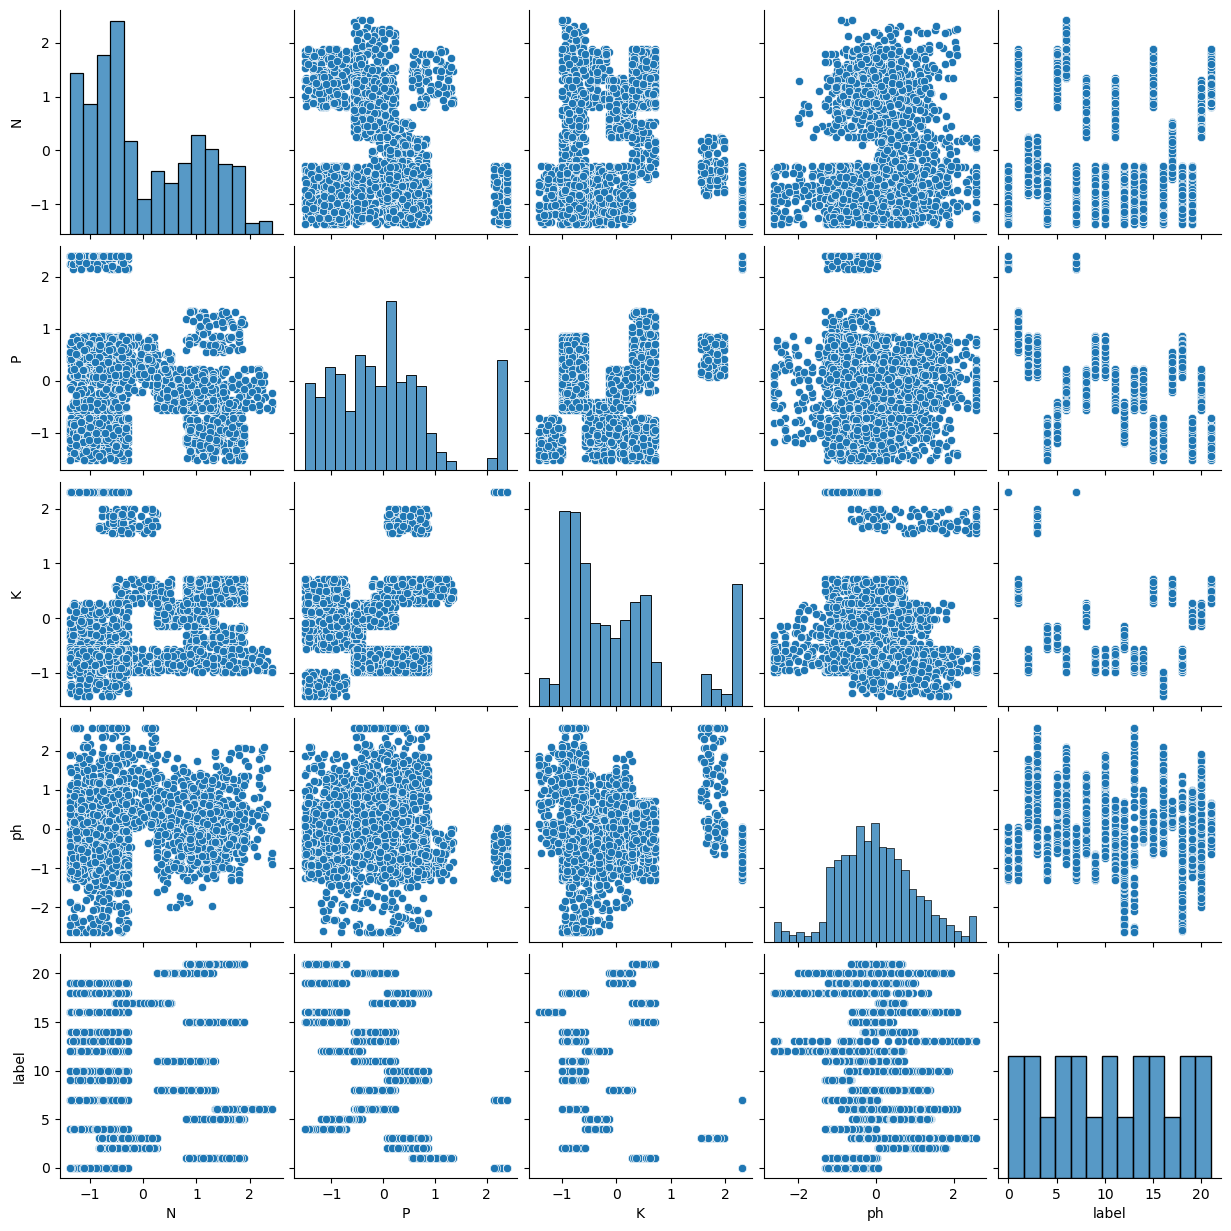

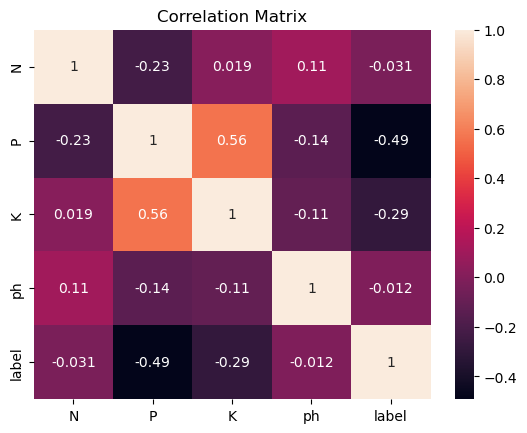

In [57]:
sns.pairplot(preprocessed_dataset1.select_dtypes(include=['float', 'int']))
plt.show()

corr_matrix = preprocessed_dataset1.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

plt.show()

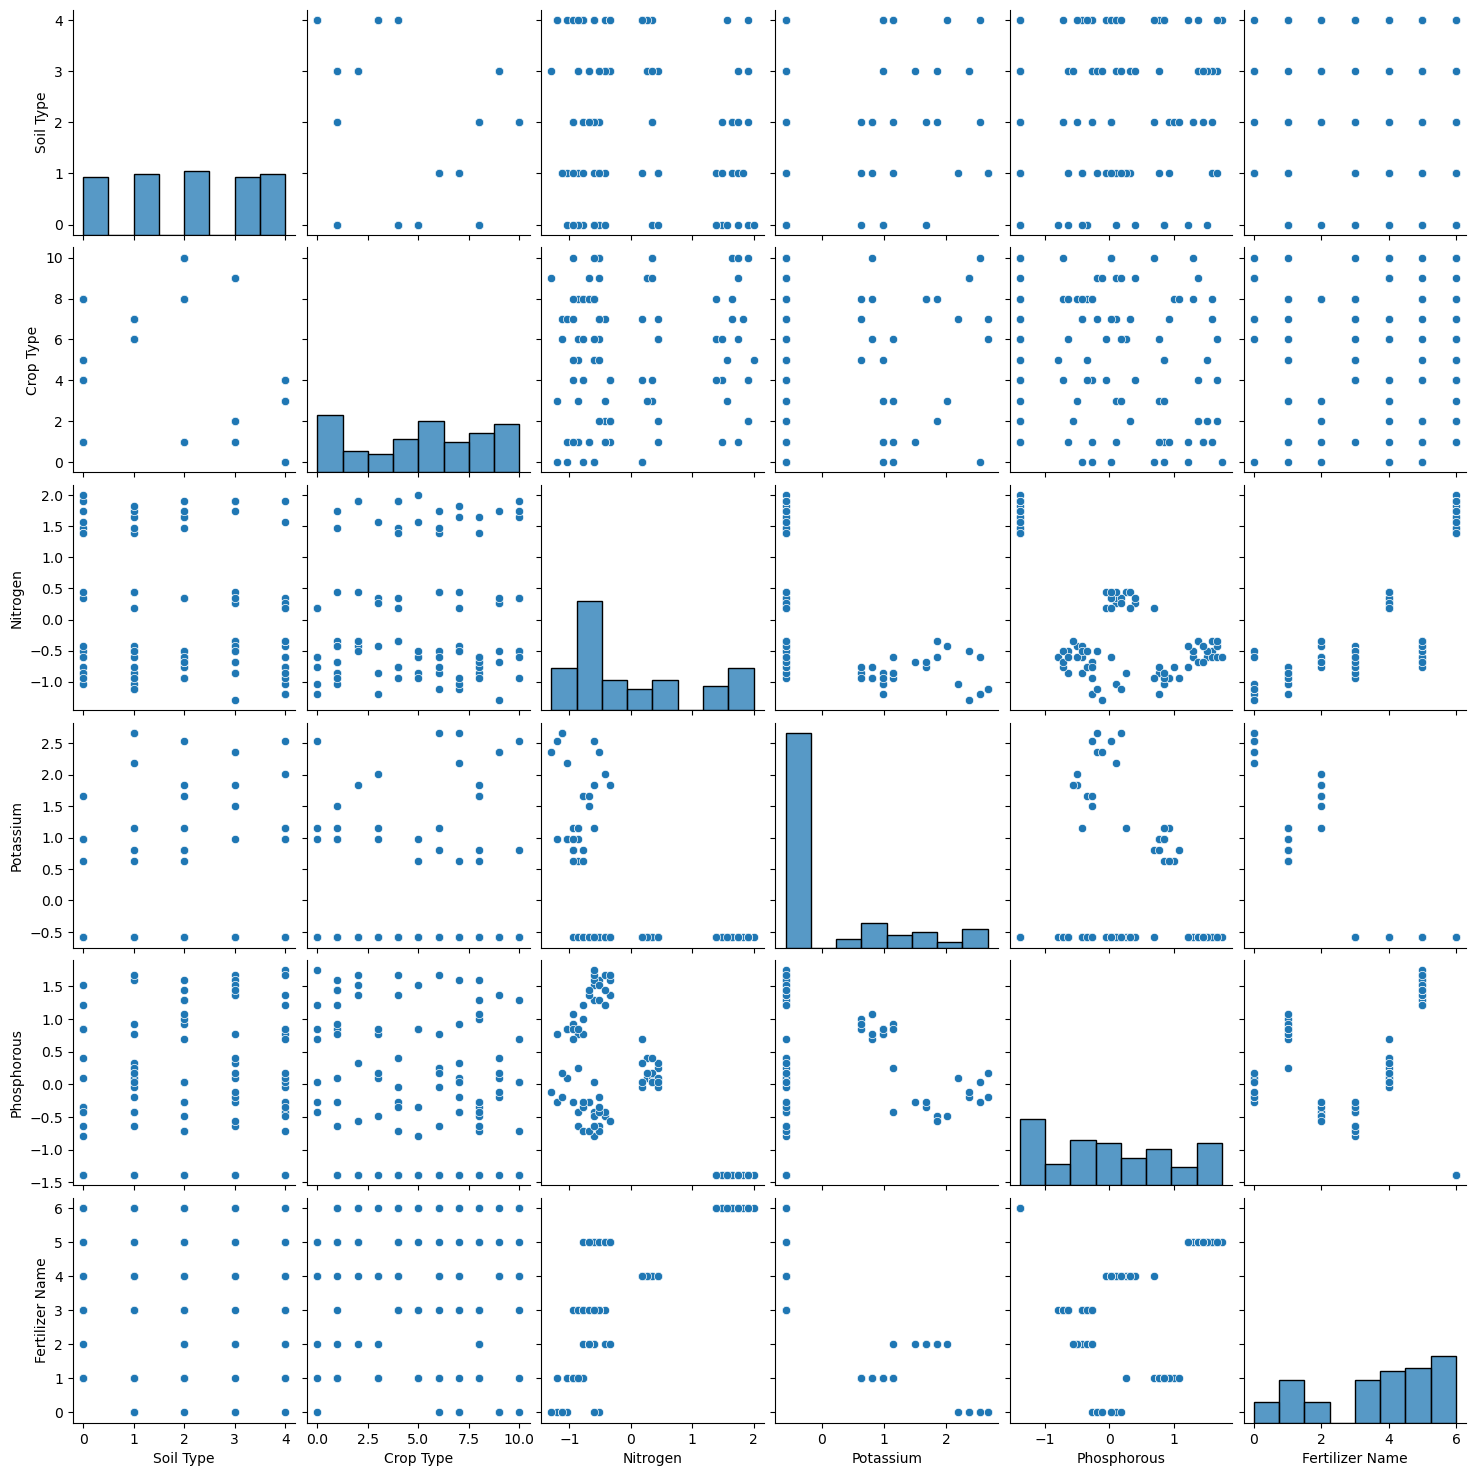

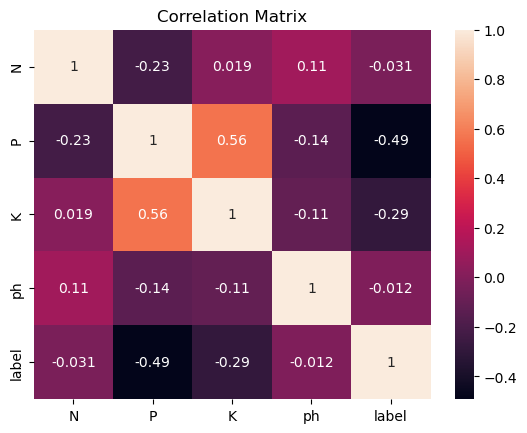

In [58]:
sns.pairplot(preprocessed_dataset2.select_dtypes(include=['float', 'int']))
plt.show()

corr_matrix = preprocessed_dataset1.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

plt.show()

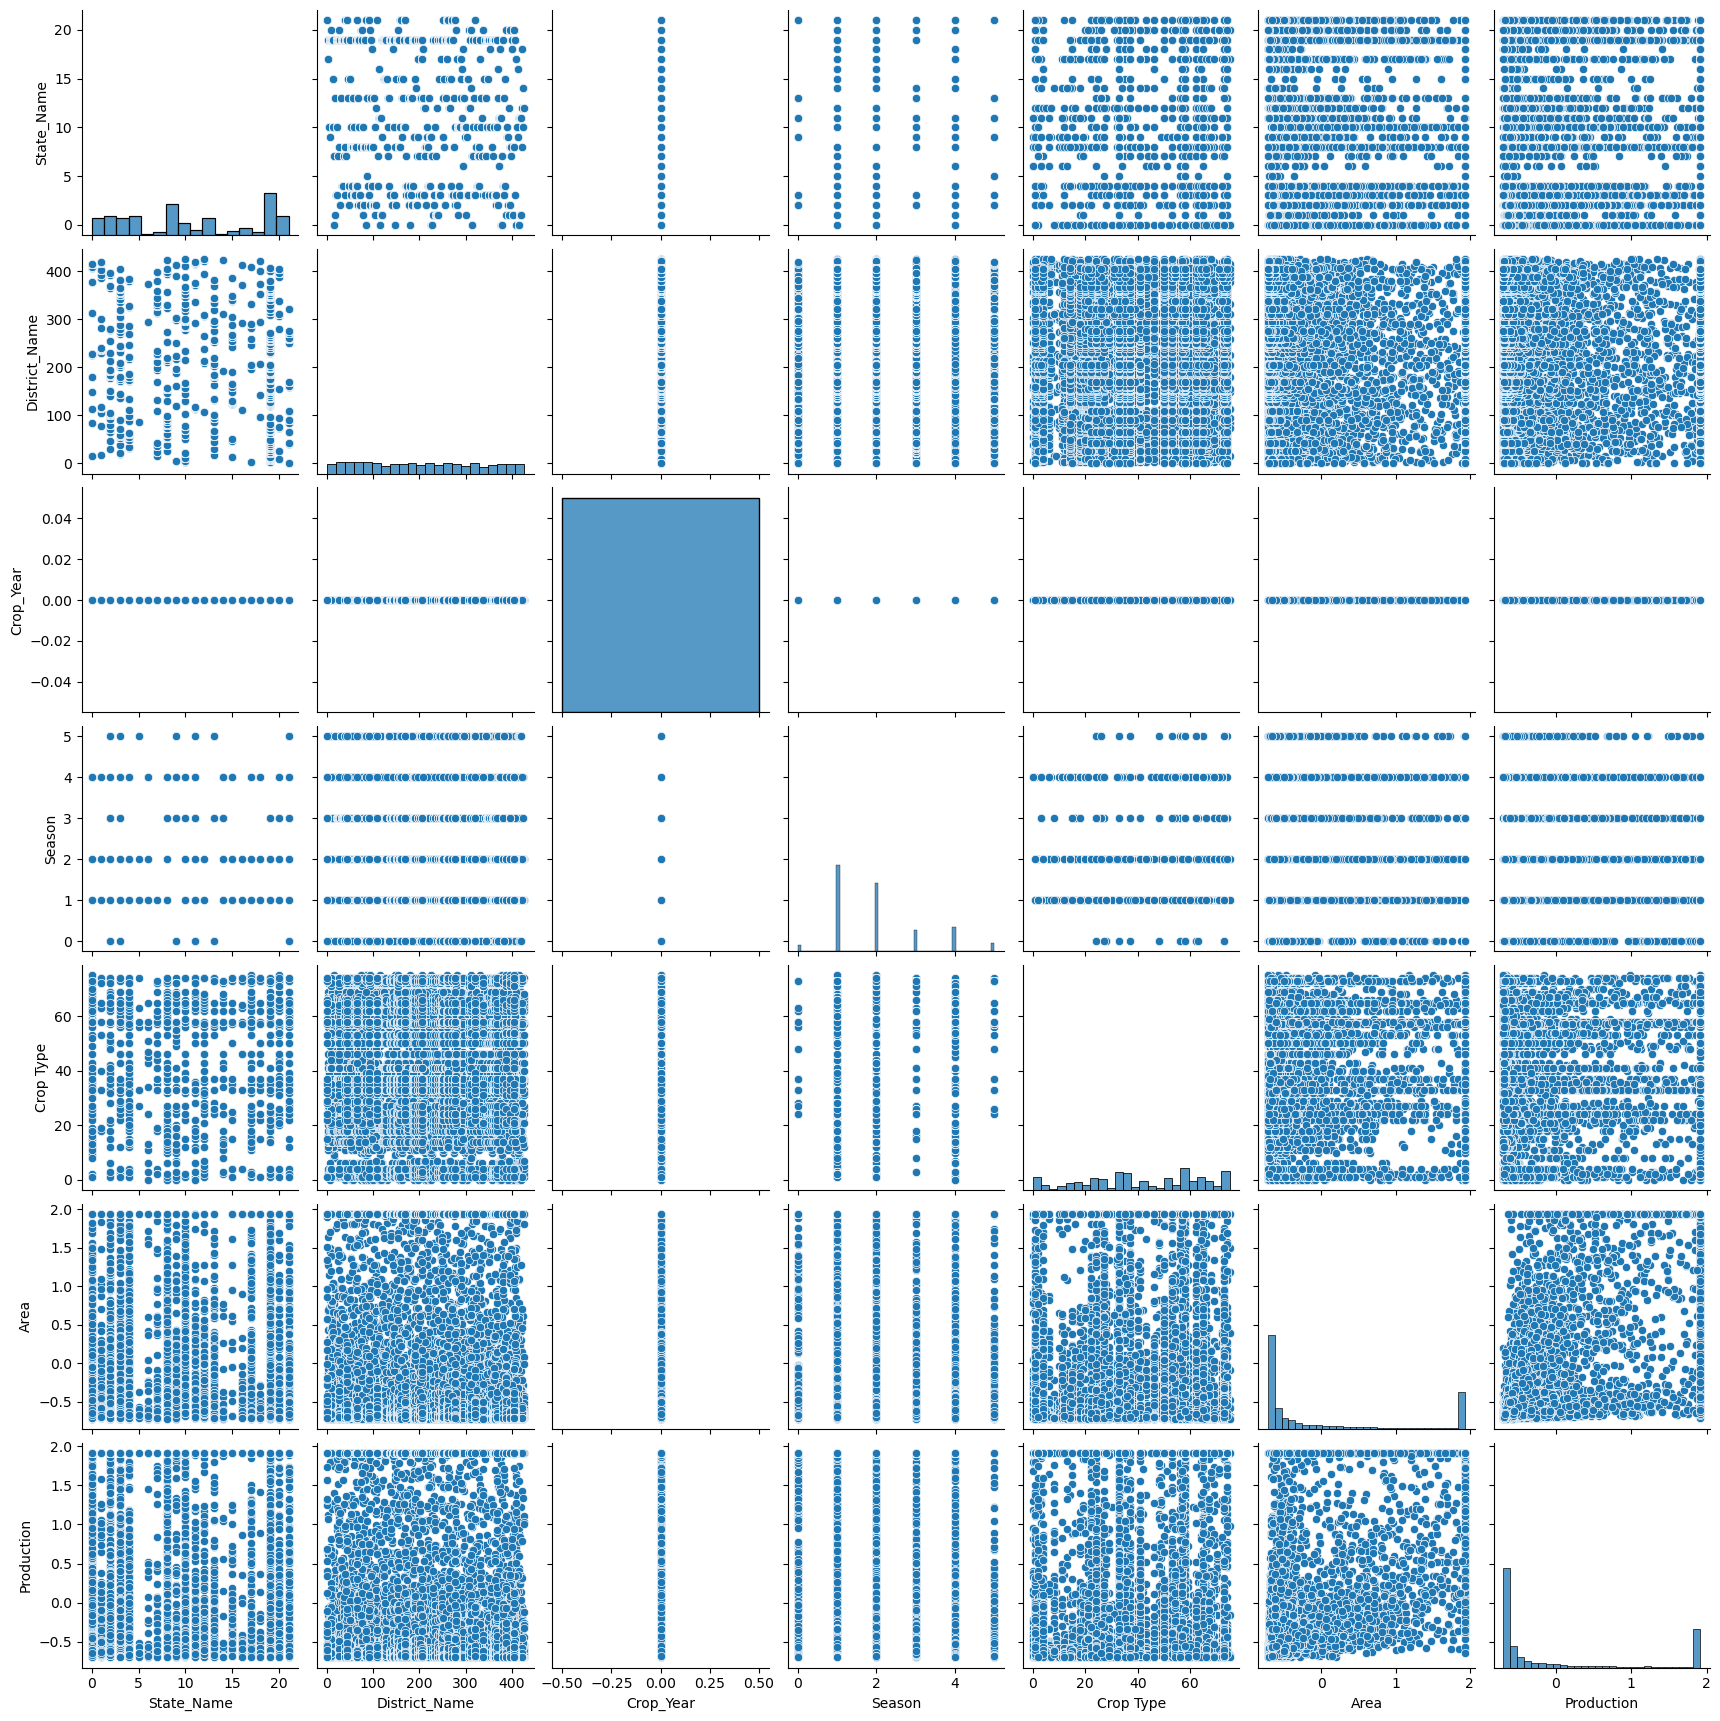

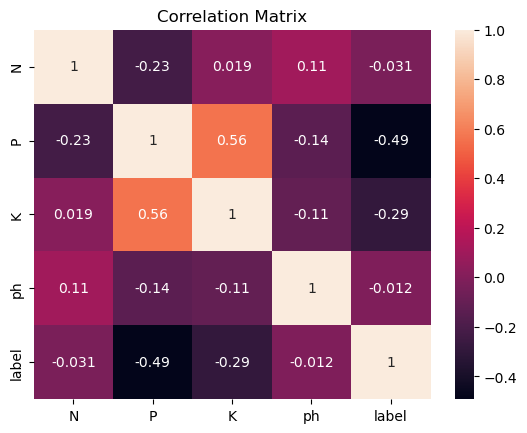

In [59]:
sns.pairplot(preprocessed_dataset3.select_dtypes(include=['float', 'int']))
plt.show()

corr_matrix = preprocessed_dataset1.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

plt.show()

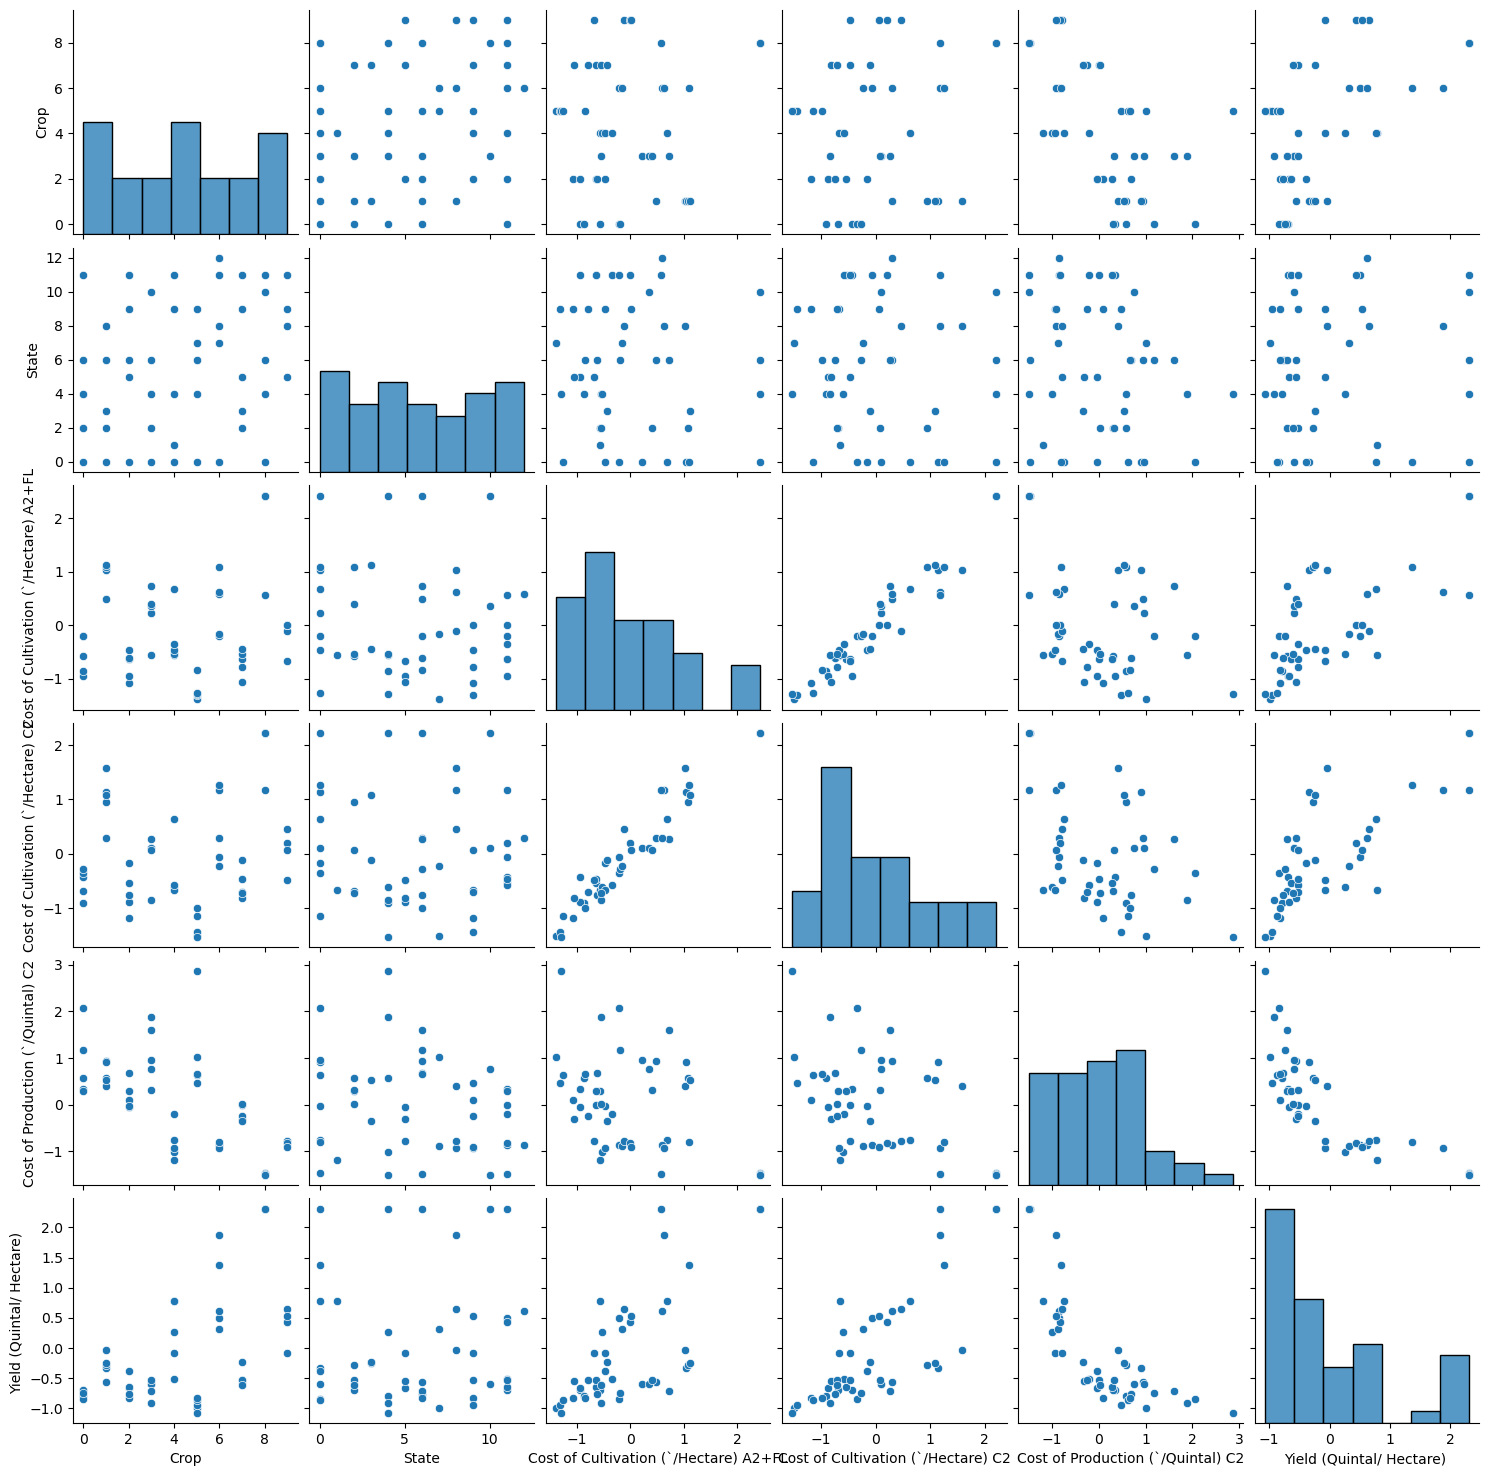

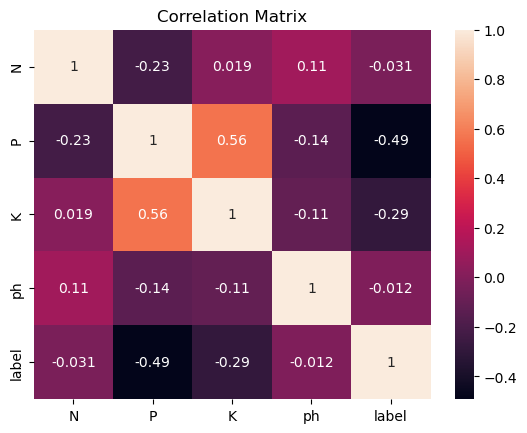

In [60]:
sns.pairplot(preprocessed_dataset4.select_dtypes(include=['float', 'int']))
plt.show()

corr_matrix = preprocessed_dataset1.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

plt.show()

In [61]:
clf = DecisionTreeClassifier()
clf.fit(X_train_1, y_train_1)
y_train_pred = clf.predict(X_train_1)
y_test_pred = clf.predict(X_test_1)

In [62]:
accuracy_train = accuracy_score(y_train_pred, y_train_1)
print(accuracy_train)
accuracy_test = accuracy_score(y_test_pred, y_test_1)
print(accuracy_test)

1.0
0.753030303030303


In [66]:
clf = DecisionTreeClassifier()
clf.fit(X_train_2, y_train_2)
y_train_pred = clf.predict(X_train_2)
y_test_pred = clf.predict(X_test_2)

In [67]:
accuracy_train = accuracy_score(y_train_pred, y_train_2)
print(accuracy_train)
accuracy_test = accuracy_score(y_test_pred, y_test_2)
print(accuracy_test)

1.0
0.9333333333333333


In [68]:
clf = DecisionTreeClassifier()
clf.fit(X_train_3, y_train_3)
y_train_pred = clf.predict(X_train_3)
y_test_pred = clf.predict(X_test_3)

In [69]:
accuracy_train = accuracy_score(y_train_pred, y_train_3)
print(accuracy_train)
accuracy_test = accuracy_score(y_test_pred, y_test_3)
print(accuracy_test)

0.1895586512172894
0.028857837181044958


In [70]:
clf = DecisionTreeClassifier()
clf.fit(X_train_4, y_train_4)
y_train_pred = clf.predict(X_train_4)
y_test_pred = clf.predict(X_test_4)

In [71]:
accuracy_train = accuracy_score(y_train_pred, y_train_4)
print(accuracy_train)
accuracy_test = accuracy_score(y_test_pred, y_test_4)
print(accuracy_test)

1.0
0.6


In [77]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_1, y_train_1.values.ravel())

y_train_pred = rf.predict(X_train_1)
y_test_pred = rf.predict(X_test_1)


In [79]:
accuracy_train = accuracy_score(y_train_pred, y_train_1)
print(accuracy_train)
accuracy_test = accuracy_score(y_test_pred, y_test_1)
print(accuracy_test)

1.0
0.803030303030303


In [81]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_2, y_train_2.values.ravel())
y_train_pred = rf.predict(X_train_2)
y_test_pred = rf.predict(X_test_2)

In [83]:
accuracy_train = accuracy_score(y_train_pred, y_train_2)
print(accuracy_train)
accuracy_test = accuracy_score(y_test_pred, y_test_2)
print(accuracy_test)

1.0
1.0


In [84]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_3, y_train_3.values.ravel())
y_train_pred = rf.predict(X_train_3)
y_test_pred = rf.predict(X_test_3)
model1_y_test_pred_ds_3 = rf.predict(X_test_3)

In [85]:
accuracy_train = accuracy_score(y_train_pred, y_train_3)
print(accuracy_train)
accuracy_test = accuracy_score(y_test_pred, y_test_3)
print(accuracy_test)

0.1895586512172894
0.028857837181044958


In [86]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_4, y_train_4.values.ravel())
y_train_pred = rf.predict(X_train_4)
y_test_pred = rf.predict(X_test_4)

In [87]:
accuracy_train = accuracy_score(y_train_pred, y_train_4)
print(accuracy_train)
accuracy_test = accuracy_score(y_test_pred, y_test_4)
print(accuracy_test)

1.0
0.4666666666666667


In [88]:
clf = xgb.XGBClassifier(objective='binary:logistic')
clf.fit(X_train_1, y_train_1)
y_train_pred = clf.predict(X_train_1)
y_test_pred = clf.predict(X_test_1)
model1_y_test_pred_ds_1 = clf.predict(X_test_1)

In [89]:
accuracy_train = accuracy_score(y_train_pred, y_train_1)
print(accuracy_train)
accuracy_test = accuracy_score(y_test_pred, y_test_1)
print(accuracy_test)

1.0
0.7803030303030303


In [90]:
clf = xgb.XGBClassifier(objective='binary:logistic')
clf.fit(X_train_2, y_train_2)
y_train_pred = clf.predict(X_train_2)
y_test_pred = clf.predict(X_test_2)
model1_y_test_pred_ds_2 = clf.predict(X_test_2)

In [91]:
accuracy_train = accuracy_score(y_train_pred, y_train_2)
print(accuracy_train)
accuracy_test = accuracy_score(y_test_pred, y_test_2)
print(accuracy_test)

1.0
0.9666666666666667


In [92]:
clf = xgb.XGBClassifier(objective='binary:logistic')
clf.fit(X_train_3, y_train_3)
y_train_pred = clf.predict(X_train_3)
y_test_pred = clf.predict(X_test_3)
model1_y_test_pred_ds_3 = clf.predict(X_test_3)

In [93]:
accuracy_train = accuracy_score(y_train_pred, y_train_3)
print(accuracy_train)
accuracy_test = accuracy_score(y_test_pred, y_test_3)
print(accuracy_test)

0.1883869287853144
0.02976913730255164


In [94]:
clf = xgb.XGBClassifier(objective='binary:logistic')
clf.fit(X_train_4, y_train_4)
y_train_pred = clf.predict(X_train_4)
y_test_pred = clf.predict(X_test_4)
model1_y_test_pred_ds_4 = clf.predict(X_test_4)

In [95]:
accuracy_train = accuracy_score(y_train_pred, y_train_4)
print(accuracy_train)
accuracy_test = accuracy_score(y_test_pred, y_test_4)
print(accuracy_test)

1.0
0.5333333333333333


In [96]:
nb = GaussianNB()
nb.fit(X_train_1, y_train_1.values.ravel())

y_train_pred = nb.predict(X_train_1)
y_test_pred = nb.predict(X_test_1)
model2_y_test_pred_ds_1 = nb.predict(X_test_1)


In [62]:
accuracy_train = accuracy_score(y_train_pred, y_train_1)
print(accuracy_train)
accuracy_test = accuracy_score(y_test_pred, y_test_1)
print(accuracy_test)

0.7967532467532468
0.7772727272727272


In [97]:
nb = GaussianNB()
nb.fit(X_train_2, y_train_2.values.ravel())
y_train_pred = nb.predict(X_train_2)
y_test_pred = nb.predict(X_test_2)
model2_y_test_pred_ds_2 = nb.predict(X_test_2)

In [98]:
accuracy_train = accuracy_score(y_train_pred, y_train_2)
print(accuracy_train)
accuracy_test = accuracy_score(y_test_pred, y_test_2)
print(accuracy_test)

1.0
1.0


In [99]:
nb = GaussianNB()
nb.fit(X_train_3, y_train_3.values.ravel())
y_train_pred = nb.predict(X_train_3)
y_test_pred = nb.predict(X_test_3)
model2_y_test_pred_ds_3 = nb.predict(X_test_3)

In [100]:
accuracy_train = accuracy_score(y_train_pred, y_train_3)
print(accuracy_train)
accuracy_test = accuracy_score(y_test_pred, y_test_3)
print(accuracy_test)

0.09425856008332248
0.08262454434993925


In [102]:
nb = GaussianNB()
nb.fit(X_train_4, y_train_4.values.ravel())
y_train_pred = nb.predict(X_train_4)
y_test_pred = nb.predict(X_test_4)
model2_y_test_pred_ds_4 = nb.predict(X_test_4)

In [68]:
accuracy_train = accuracy_score(y_train_pred, y_train_4)
print(accuracy_train)
accuracy_test = accuracy_score(y_test_pred, y_test_4)
print(accuracy_test)

0.8529411764705882
0.6666666666666666


In [69]:
accuracy_train = accuracy_score(y_train_pred, y_train_4)
print(accuracy_train)
accuracy_test = accuracy_score(y_test_pred, y_test_4)
print(accuracy_test)

0.8529411764705882
0.6666666666666666


In [103]:
model = SVC(kernel='linear', C=1, random_state=42)
model.fit(X_train_1, y_train_1.values.ravel())
y_train_pred = model.predict(X_train_1)
y_test_pred = model.predict(X_test_1)
model3_y_test_pred_ds_1 = model.predict(X_test_1)

In [72]:
accuracy_train = accuracy_score(y_train_pred, y_train_1)
print(accuracy_train)
accuracy_test = accuracy_score(y_test_pred, y_test_1)
print(accuracy_test)

0.7383116883116884
0.7075757575757575


In [104]:
model = SVC(kernel='linear', C=1, random_state=42)
model.fit(X_train_2, y_train_2.values.ravel())
y_train_pred = model.predict(X_train_2)
y_test_pred = model.predict(X_test_2)
model3_y_test_pred_ds_2 = model.predict(X_test_2)

In [107]:
accuracy_train = accuracy_score(y_train_pred, y_train_2)
print(accuracy_train)
accuracy_test = accuracy_score(y_test_pred, y_test_2)
print(accuracy_test)

1.0
1.0


In [111]:
model = SVC(kernel='linear', C=1, random_state=42)
model.fit(X_train_3, y_train_3.values.ravel())
y_train_pred = model.predict(X_train_3)
y_test_pred = model.predict(X_test_3)
model3_y_test_pred_ds_3 = model.predict(X_test_3)

KeyboardInterrupt: 

In [ ]:
accuracy_train = accuracy_score(y_train_pred, y_train_3)
print(accuracy_train)
accuracy_test = accuracy_score(y_test_pred, y_test_3)
print(accuracy_test)

In [108]:
model = SVC(kernel='linear', C=1, random_state=42)
model.fit(X_train_4, y_train_4.values.ravel())
y_train_pred = model.predict(X_train_4)
y_test_pred = model.predict(X_test_4)
model3_y_test_pred_ds_4 = model.predict(X_test_4)

In [109]:
accuracy_train = accuracy_score(y_train_pred, y_train_4)
print(accuracy_train)
accuracy_test = accuracy_score(y_test_pred, y_test_4)
print(accuracy_test)

0.6470588235294118
0.3333333333333333


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [ ]:
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': [i for i in range(2, 100)]}

grid_search = GridSearchCV(knn, param_grid=param_grid, cv=5)
grid_search.fit(X_train_1, y_train_1.values.ravel())

print("Best parameter value:", grid_search.best_params_)
print("Best accuracy score:", grid_search.best_score_)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_1, y_train_1.values.ravel())

y_train_pred = knn.predict(X_train_1)
y_test_pred = knn.predict(X_test_1)
model4_y_test_pred_ds_1 = knn.predict(X_test_1)

accuracy_train = accuracy_score(y_train_pred, y_train_1.values.ravel())
print(accuracy_train)
accuracy_test = accuracy_score(y_test_pred, y_test_1.values.ravel())
print(accuracy_test)


In [ ]:
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': [i for i in range(2, 20)]}

grid_search = GridSearchCV(knn, param_grid=param_grid, cv=5)
grid_search.fit(X_train_2, y_train_2)

print("Best parameter value:", grid_search.best_params_)
print("Best accuracy score:", grid_search.best_score_)

In [82]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_2, y_train_2)
y_train_pred = knn.predict(X_train_2)
y_test_pred = knn.predict(X_test_2)
model4_y_test_pred_ds_2 = knn.predict(X_test_2)

accuracy_train = accuracy_score(y_train_pred, y_train_2)
print(accuracy_train)
accuracy_test = accuracy_score(y_test_pred, y_test_2)
print(accuracy_test)

0.9130434782608695
0.6333333333333333


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [83]:
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': [i for i in range(2, 20)]}

grid_search = GridSearchCV(knn, param_grid=param_grid, cv=5)
grid_search.fit(X_train_3, y_train_3)

print("Best parameter value:", grid_search.best_params_)
print("Best accuracy score:", grid_search.best_score_)

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\KIIT\a

Best parameter value: {'n_neighbors': 18}
Best accuracy score: 0.024085576610279765


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [84]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train_3, y_train_3)
y_train_pred = knn.predict(X_train_3)
y_test_pred = knn.predict(X_test_3)
model4_y_test_pred_ds_3 = knn.predict(X_test_3)

accuracy_train = accuracy_score(y_train_pred, y_train_3)
print(accuracy_train)
accuracy_test = accuracy_score(y_test_pred, y_test_3)
print(accuracy_test)

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.12172894154406978
0.015188335358444714


In [85]:
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': [i for i in range(3, 10)]}

grid_search = GridSearchCV(knn, param_grid=param_grid, cv=2)
grid_search.fit(X_train_4, y_train_4)

print("Best parameter value:", grid_search.best_params_)
print("Best accuracy score:", grid_search.best_score_)

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

Best parameter value: {'n_neighbors': 4}
Best accuracy score: 0.4117647058823529


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [87]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_4, y_train_4)
y_train_pred = knn.predict(X_train_4)
y_test_pred = knn.predict(X_test_4)
model4_y_test_pred_ds_4 = knn.predict(X_test_4)

accuracy_train = accuracy_score(y_train_pred, y_train_4)
print(accuracy_train)
accuracy_test = accuracy_score(y_test_pred, y_test_4)
print(accuracy_test)

0.6470588235294118
0.6


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [88]:
def merge_preds_ds1(model1_y_test_pred_ds_1, model2_y_test_pred_ds_1, model3_y_test_pred_ds_1, model4_y_test_pred_ds_1):
    stacked_preds = np.stack((model1_y_test_pred_ds_1, model2_y_test_pred_ds_1, model3_y_test_pred_ds_1, model4_y_test_pred_ds_1), axis=1)
    ensemble_preds = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=1, arr=stacked_preds)
    return ensemble_preds

merged_preds_ds1 = merge_preds_ds1(model1_y_test_pred_ds_1, model2_y_test_pred_ds_1, model3_y_test_pred_ds_1, model4_y_test_pred_ds_1)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_1, merged_preds_ds1)
print('Merged model accuracy:', accuracy)

Merged model accuracy: 0.7833333333333333


In [103]:
print("Accuracy Score :", round(accuracy_score(y_test_1, merged_preds_ds1)*100 ,2), "%")

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test_1, merged_preds_ds1, average='micro')))
print('Precision Score : ',(precision_score(y_test_1, merged_preds_ds1, average='micro')))
print('Recall Score : ',(recall_score(y_test_1, merged_preds_ds1, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test_1, merged_preds_ds1, average='micro')))

Accuracy Score : 78.33 %
F-1 Score :  0.7833333333333333
Precision Score :  0.7833333333333333
Recall Score :  0.7833333333333333
Jaccard Score :  0.6438356164383562


Text(0.5, 1.0, 'Accuracy Score : 0.7833333333333333')

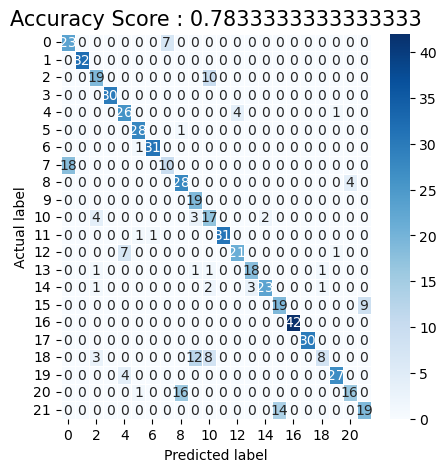

In [108]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_1, merged_preds_ds1)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score : {0}'.format(accuracy_score(y_test_1, merged_preds_ds1))
plt.title(all_sample_title, size = 15)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = dtree.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

In [89]:
def merge_preds_ds2(model1_y_test_pred_ds_2, model2_y_test_pred_ds_2, model3_y_test_pred_ds_2, model4_y_test_pred_ds_2):
    stacked_preds = np.stack((model1_y_test_pred_ds_2, model2_y_test_pred_ds_2, model3_y_test_pred_ds_2, model4_y_test_pred_ds_2), axis=1)
    ensemble_preds = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=1, arr=stacked_preds)
    return ensemble_preds

merged_preds_ds2 = merge_preds_ds1(model1_y_test_pred_ds_2, model2_y_test_pred_ds_2, model3_y_test_pred_ds_2, model4_y_test_pred_ds_2)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_2, merged_preds_ds2)
print('Merged model accuracy:', accuracy)

Merged model accuracy: 1.0


In [102]:
print("Accuracy Score :", round(accuracy_score(y_test_2, merged_preds_ds2)*100 ,2), "%")

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test_2, merged_preds_ds2, average='micro')))
print('Precision Score : ',(precision_score(y_test_2, merged_preds_ds2, average='micro')))
print('Recall Score : ',(recall_score(y_test_2, merged_preds_ds2, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test_2, merged_preds_ds2, average='micro')))

Accuracy Score : 100.0 %
F-1 Score :  1.0
Precision Score :  1.0
Recall Score :  1.0
Jaccard Score :  1.0


Text(0.5, 1.0, 'Accuracy Score : 1.0')

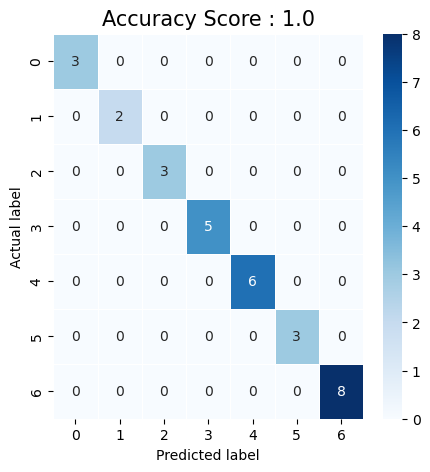

In [110]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_2, merged_preds_ds2)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score : {0}'.format(accuracy_score(y_test_2, merged_preds_ds2))
plt.title(all_sample_title, size = 15)

In [96]:
def merge_preds_ds4(model1_y_test_pred_ds_4, model2_y_test_pred_ds_4, model3_y_test_pred_ds_4, model4_y_test_pred_ds_4):
    stacked_preds = np.stack((model1_y_test_pred_ds_4, model2_y_test_pred_ds_4, model3_y_test_pred_ds_4, model4_y_test_pred_ds_4), axis=1)
    ensemble_preds = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=1, arr=stacked_preds)
    return ensemble_preds

merged_preds_ds4 = merge_preds_ds4(model1_y_test_pred_ds_4, model2_y_test_pred_ds_4,  model3_y_test_pred_ds_4, model4_y_test_pred_ds_4)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_4, merged_preds_ds4)
print('Merged model accuracy:', accuracy)

Merged model accuracy: 0.6


In [104]:
print("Accuracy Score :", round(accuracy_score(y_test_4, merged_preds_ds4)*100 ,2), "%")

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test_4, merged_preds_ds4, average='micro')))
print('Precision Score : ',(precision_score(y_test_4, merged_preds_ds4, average='micro')))
print('Recall Score : ',(recall_score(y_test_4, merged_preds_ds4, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test_4, merged_preds_ds4, average='micro')))

Accuracy Score : 60.0 %
F-1 Score :  0.6
Precision Score :  0.6
Recall Score :  0.6
Jaccard Score :  0.42857142857142855


Text(0.5, 1.0, 'Accuracy Score : 0.6')

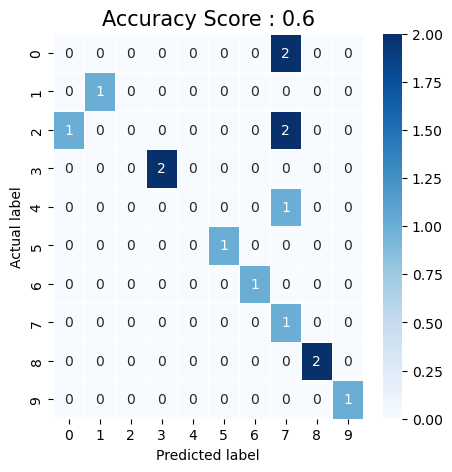

In [109]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_4, merged_preds_ds4)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score : {0}'.format(accuracy_score(y_test_4, merged_preds_ds4))
plt.title(all_sample_title, size = 15)